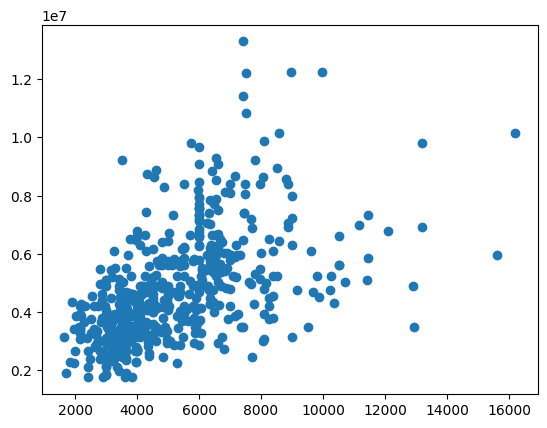

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/nishankrai/Desktop/Practice/Machine Learning/MLfromScratch/data/Housing.csv')
df = df.drop(columns = ['bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'])


plt.scatter(df["area"], df["price"])

epochs: 0
epochs: 50
epochs: 100
epochs: 150
epochs: 200
epochs: 250
epochs: 300
epochs: 350
epochs: 400
epochs: 450
epochs: 500
epochs: 550
epochs: 600
epochs: 650
epochs: 700
epochs: 750
epochs: 800
epochs: 850
epochs: 900
epochs: 950
855.709809953853 0.859850378073895


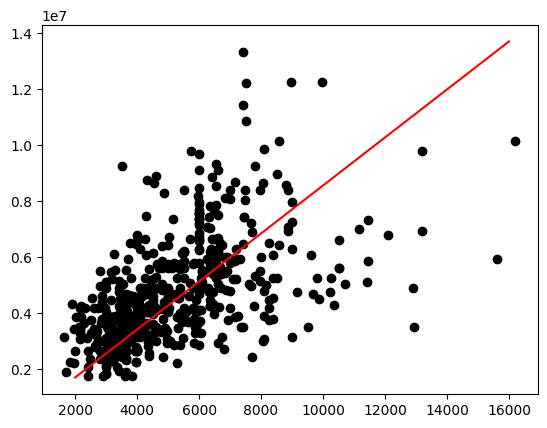

In [2]:
#Graident descent (MSE)

def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i]["area"]
        y = points.iloc[i]["price"]
        

        m_gradient += (-2/n) * x * (y-(m_now * x + b_now))
        b_gradient += (-2/n) * (y-(m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

m = 0
b = 0
L = 0.000000001
epochs = 1000
 
for i in range(epochs):
    if i % 50 == 0:
        print(f"epochs: {i}")
    m, b, = gradient_descent(m, b, df, L)

print(m,b)
plt.scatter(df["area"], df["price"], color = "black")
plt.plot(list(range(2000,16000)), [m *x + b for x in range(2000, 16000)], color = "red")
plt.show()

epochs: 0
epochs: 50
786.9250713014285 0.28121507115855165


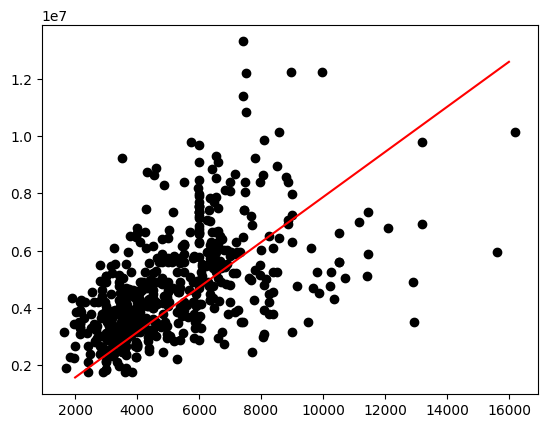

In [9]:

def stochastic_gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)
    r = np.random.randint(0, n)

  
    x = points.iloc[r]["area"]
    y = points.iloc[r]["price"]
        

    m_gradient += (-2/n) * x * (y-(m_now * x + b_now))
    b_gradient += (-2/n) * (y-(m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L

    return m, b

m = 0
b = 0
L = 0.000001
epochs = 100
 
for i in range(epochs):
    if i % 50 == 0:
        print(f"epochs: {i}")
    m, b, = stochastic_gradient_descent(m, b, df, L)

print(m,b)
plt.scatter(df["area"], df["price"], color = "black")
plt.plot(list(range(2000,16000)), [m *x + b for x in range(2000, 16000)], color = "red")
plt.show()

epochs: 0
epochs: 50
epochs: 100
epochs: 150
epochs: 200
epochs: 250
epochs: 300
epochs: 350
epochs: 400
epochs: 450
epochs: 500
epochs: 550
epochs: 600
epochs: 650
epochs: 700
epochs: 750
epochs: 800
epochs: 850
epochs: 900
epochs: 950
895.0876152931944 1.6946270688328524


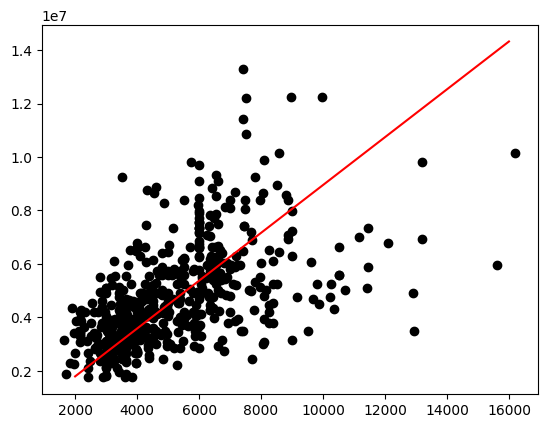

In [13]:
def gradient_descent(m_now, b_now, points, L, delta=1.0):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i]["area"]
        y = points.iloc[i]["price"]

        y_pred = m_now * x + b_now
        error = y - y_pred

        # Huber gradient
        if abs(error) <= delta:
            grad = -error
        else:
            grad = -delta * np.sign(error)

        m_gradient += (grad * x) / n
        b_gradient += (grad) / n

    m = m_now - L * m_gradient
    b = b_now - L * b_gradient
    return m, b


m = 0
b = 0
L = 0.01
epochs = 1000

for i in range(epochs):
    if i % 50 == 0:
        print(f"epochs: {i}")
    m, b = gradient_descent(m, b, df, L)

print(m, b)

plt.scatter(df["area"], df["price"], color="black")
plt.plot(list(range(2000, 16000)), [m * x + b for x in range(2000, 16000)], color="red")
plt.show()
